In [ ]:
import pandas as pd
churn_data = pd.read_csv('data\churn.csv')
#churn_data.head()



<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\LesivGamers\AppData\Local\Temp\ipykernel_20560\3100629208.py:2: SyntaxWarning: invalid escape sequence '\c'
  churn_data = pd.read_csv('data\churn.csv')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

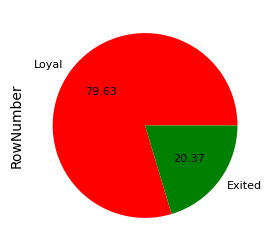

In [64]:
leakage = churn_data.groupby(by='Exited')['RowNumber'].count()
leakage
fig1 = leakage.plot.pie(
    labels=["Loyal", "Exited"],
    colors=["r", "g"],
    autopct="%.2f",
    fontsize=8,
    figsize=(3, 3),
)

Банку удается удерживать около 80% клиентов

# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
mask1 = churn_data['Balance'] > 2500 # 
fig2 = px.histogram(
    data_frame=churn_data[mask1],
    x = 'Balance',
    title='$2500 users balance split',
    labels={'Balance': 'Balance, USD', 'count': 'Customers #'},
    nbins=100
    )
fig2.update_layout(yaxis_title="Customers #")
display(fig2)

В банке преобладают клиенты с балансом от 100 до 150 К долларов. В каждой из групп в этом диапазоне находится более 250 клиентов, при этом в группах до 90тыс и более 155 тыс - не более 200 клиентов.
Это может быть связано со слабым привлечением молодой аудитории с низким уровнем накоплений, а также с невыгодными ставками по крупным вкладам, что вынуждает клиентов уходить в другие банки.
Для более полной оценки следует сравнить это распределение с аналогичным по рынку, в целом.


## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


churn_data = pd.read_csv('data\churn.csv')

fig3 = px.histogram(churn_data,
                   x='Balance',
                   nbins=20,
                   title='Распределение баланса клиентов по оттоку',
                   color="Exited",
                   histnorm="percent",
                   color_discrete_sequence=['red', 'blue'],
                   opacity=0.7)
fig3.update_xaxes(title_text='Баланс')
fig3.update_yaxes(title_text='Количество клиентов')
fig3.show()

<>:7: SyntaxWarning:

invalid escape sequence '\c'

<>:7: SyntaxWarning:

invalid escape sequence '\c'

C:\Users\lesiv\AppData\Local\Temp\ipykernel_4036\612194248.py:7: SyntaxWarning:

invalid escape sequence '\c'



Подавляющее большинство лояльных клиентов имеет баланс до 10К USD, при этом среди ушедших доля клиентов с балансом до 10К и от 110 до 130К USD сопоставима.
Банк теярет наиболее состоятельных клинетов, возможно, в следствие невыгодных условий для накоплений по крупным вкладам.

<function matplotlib.pyplot.show(close=None, block=None)>

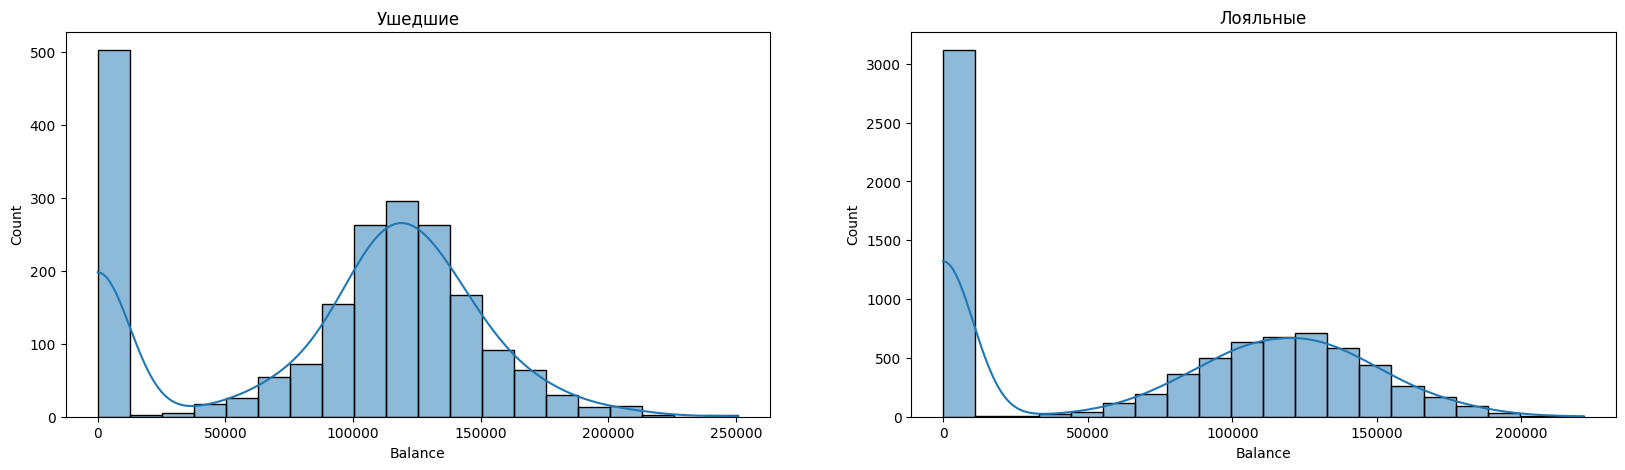

In [ ]:
exited93=churn_data[churn_data['Exited']>0]
#exited.head()
nonexited93=churn_data[churn_data['Exited']<1]

fig, axes = plt.subplots(1, 2, figsize = (20, 5))

sns.histplot(
    data=exited93,
    x='Balance',
    bins=20,
    kde=True,
    ax=axes[0],
);
axes[0].set_title('Ушедшие')
sns.histplot(
    data=nonexited93,
    x='Age',
    bins=20,
    kde=True,
    ax=axes[1]
);
axes[1].set_title('Лояльные')
plt.show

## 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

<function matplotlib.pyplot.show(close=None, block=None)>

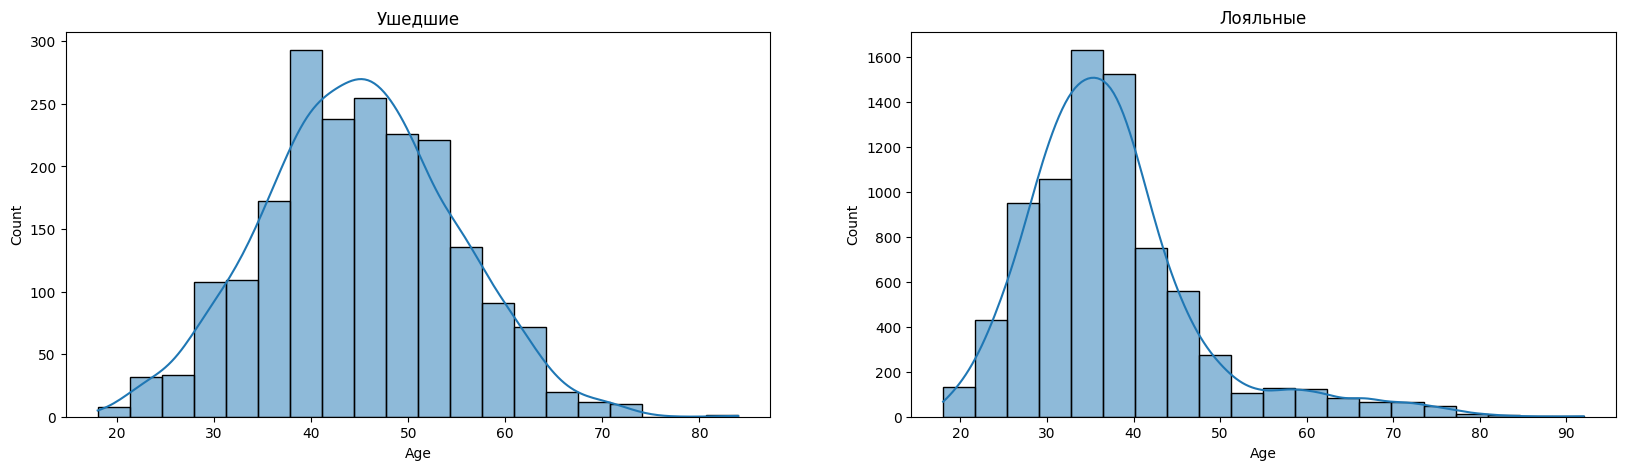

In [50]:
exited=churn_data[churn_data['Exited']>0]
#exited.head()
nonexited=churn_data[churn_data['Exited']<1]

fig, axes = plt.subplots(1, 2, figsize = (20, 5))

sns.histplot(
    data=exited,
    x='Age',
    bins=20,
    kde=True,
    ax=axes[0],
);
axes[0].set_title('Ушедшие')
sns.histplot(
    data=nonexited,
    x='Age',
    bins=20,
    kde=True,
    ax=axes[1]
);
axes[1].set_title('Лояльные')
plt.show

Наибольшее число лояльных клиентов находится в возрасте 35 лет, при этом очевидный выброс в распределении ушедших клиентов наблюдаем в возрасте 40 лет.
Банку следует сфокусироваться на удержании клиентов в диапазоне от 35 до 40 лет

## 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его прдполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

<Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>

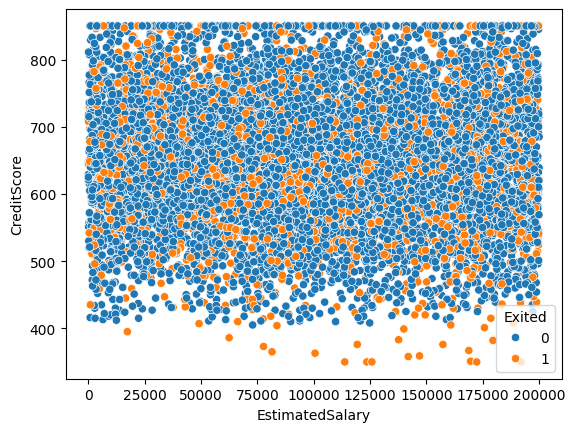

In [14]:
#sns.lineplot(data=churn_data, x="CreditScore", y="EstimatedSalary")
sns.scatterplot(data=churn_data, x="EstimatedSalary", y="CreditScore", hue="Exited",sizes=(2, 200), legend="full")

Из графика следует, что как среди лояльных, так и среди ушедших клиентов взаимосвязь между кредитным рейтингом и зарплатой отсутствует. При этом стоит отметить, что все клиенты с к/р ниже 400 ушли из банка. Зарплата большей части из них значительно превышает среднюю. В целом, большая часть ушедших клиентов обладает кредитным рейтингом ниже 600.

# 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.